In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

In [141]:
!pwd

/data/sukritk/scheduling/erdos-scheduling-simulator/results


In [41]:
goodput = {
    "FIFO": {
        80: [987, 948, 980],
        85: [963, 944, 979],
        90: [945, 958, 971],
        95: [893, 917, 978],
       100: [879, 925, 952],
       105: [876, 974, 953],
       115: [759, 741, 906],
       120: [688, 694, 893],
       130: [313, 212, 779],
       135: [149,  85,  96],
       140: [ 87, 201,  67],
       145: [ 47,  55,  52],
       150: [ 61,  58,  69],
       155: [133, 154, 140],
       160: [153, 135, 132],
       175: [120, 121, 145],
    },
    "EDF": {
        80: [994, 973, 989],
        85: [980, 972, 987],
        90: [979, 982, 982],
        95: [964, 964, 985],
       100: [958, 965, 978],
       105: [956, 989, 981],
       115: [945, 924, 964],
       120: [915, 914, 957],
       130: [871, 833, 941],
       135: [830, 791, 840],
       140: [760, 741, 768],
       145: [735, 653, 743],
       150: [687, 655, 692],
       155: [595, 520, 591],
       160: [552, 487, 548],
       175: [411, 388, 426],
    },
    "Graphene": {
        80: [991, 960, 982],
        85: [972, 962, 979],
        90: [963, 965, 977],
        95: [927, 940, 982],
       100: [926, 943, 969],
       105: [922, 973, 961],
       115: [849, 831, 929],
       120: [815, 797, 924],
       130: [653, 615, 841],
       135: [568, 587, 627],
       140: [537, 566, 592],
       145: [518, 497, 572],
       150: [472, 530, 519],
       155: [520, 504, 546],
       160: [513, 481, 517],
       175: [430, 423, 484],
    },
    "TetriSched": {
        80: [992, 976, 991],
        85: [977, 973, 990],
        90: [980, 981, 988],
        95: [964, 964, 987],
       100: [971, 966, 979],
       105: [969, 982, 982],
       115: [951, 921, 962],
       120: [929, 906, 954],
       130: [894, 845, 924],
       135: [841, 803, 826],
       140: [785, 753, 793],
       145: [760, 717, 760],
       150: [731, 701, 734],
       155: [670, 611, 678],
       160: [666, 601, 636],
       175: [561, 534, 577],
    },
    "DAGSched": {
        80: [999, 997, 998],
        85: [998, 997, 999],
        90: [996, 996, 999],
        95: [995, 997, 998],
       100: [996, 992, 997],
       105: [994, 994, 996],
       115: [993, 975, 991],
       120: [979, 974, 988],
       130: [969, 938, 973],
       135: [921, 904, 931],
       140: [914, 889, 906],
       145: [893, 885, 897],
       150: [888, 861, 883],
       155: [853, 836, 852],
       160: [868, 820, 833],
       175: [788, 770, 797],
    }
}

In [42]:
datapoints = {}
for scheduler, arrival_rates in goodput.items():
    datapoints[scheduler] = {}
    for arrival_rate, attainment in arrival_rates.items():
        attainments = np.array(attainment) / 10
        datapoints[scheduler][arrival_rate] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: FIFO
Rate: 80, Data: DataPoint(min=94.8, mean=97.16666666666667, median=98.0, max=98.7, sd=2.0792626898334285)
Rate: 85, Data: DataPoint(min=94.4, mean=96.2, median=96.3, max=97.9, sd=1.7521415467935229)
Rate: 90, Data: DataPoint(min=94.5, mean=95.8, median=95.8, max=97.1, sd=1.2999999999999972)
Rate: 95, Data: DataPoint(min=89.3, mean=92.93333333333334, median=91.7, max=97.8, sd=4.382160806421111)
Rate: 100, Data: DataPoint(min=87.9, mean=91.86666666666667, median=92.5, max=95.2, sd=3.690979996333402)
Rate: 105, Data: DataPoint(min=87.6, mean=93.43333333333334, median=95.3, max=97.4, sd=5.159780357082401)
Rate: 115, Data: DataPoint(min=74.1, mean=80.2, median=75.9, max=90.6, sd=9.051519209502898)
Rate: 120, Data: DataPoint(min=68.8, mean=75.83333333333333, median=69.4, max=89.3, sd=11.66633332857129)
Rate: 130, Data: DataPoint(min=21.2, mean=43.46666666666667, median=31.3, max=77.9, sd=30.24472405781434)
Rate: 135, Data: DataPoint(min=8.5, mean=11.0, median=9.6, max=14.9, s

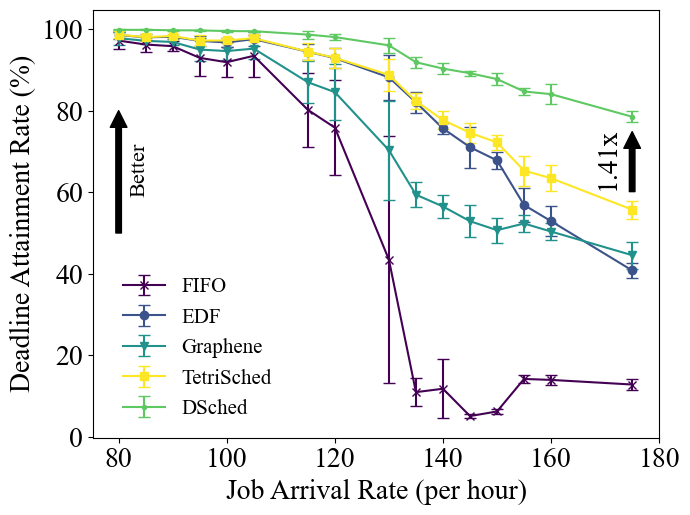

In [66]:
plt.figure(figsize=(7,5.25))
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors
x_vals = list(sorted(datapoints["EDF"].keys()))
plt.errorbar(x_vals, 
             [datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals, 
             [datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals, 
             [datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals,
             [datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
plt.xticks(list(np.arange(80, 190, 20)))
# plt.ylim((30, 105))
# plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="lower left", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
plt.tight_layout()
# plt.legend()
plt.annotate('', xy=(175, 75), xytext=(175, 60),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")

plt.annotate('', xy=(80, (80)), xytext=(80, (50)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(82, 60, "Better", color='black', fontsize=16, rotation="vertical")
plt.savefig("ddl_attainment_vs_arrival_rate.pdf", dpi=300, pad_inches=0)

In [5]:
miss_rate_datapoints = {}
for scheduler, arrival_rates in goodput.items():
    miss_rate_datapoints[scheduler] = {}
    for arrival_rate, attainment in arrival_rates.items():
        attainments = 100 - (np.array(attainment) / 10)
        miss_rate_datapoints[scheduler][arrival_rate] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, arrival_rates in miss_rate_datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: FIFO
Rate: 80, Data: DataPoint(min=1.2999999999999972, mean=2.8333333333333335, median=2.0, max=5.200000000000003, sd=2.0792626898334285)
Rate: 85, Data: DataPoint(min=2.0999999999999943, mean=3.799999999999997, median=3.700000000000003, max=5.599999999999994, sd=1.7521415467935229)
Rate: 90, Data: DataPoint(min=2.9000000000000057, mean=4.200000000000003, median=4.200000000000003, max=5.5, sd=1.2999999999999972)
Rate: 95, Data: DataPoint(min=2.200000000000003, mean=7.066666666666667, median=8.299999999999997, max=10.700000000000003, sd=4.382160806421111)
Rate: 100, Data: DataPoint(min=4.799999999999997, mean=8.133333333333331, median=7.5, max=12.099999999999994, sd=3.690979996333402)
Rate: 105, Data: DataPoint(min=2.5999999999999943, mean=6.566666666666667, median=4.700000000000003, max=12.400000000000006, sd=5.159780357082401)
Rate: 115, Data: DataPoint(min=9.400000000000006, mean=19.8, median=24.099999999999994, max=25.900000000000006, sd=9.051519209502898)
Rate: 120, Data

In [124]:
miss_rate_datapoints["TetriSched"][175].mean / miss_rate_datapoints["DAGSched"][175].mean 

2.0589147286821707

In [130]:
miss_rate_datapoints["TetriSched"][175].mean

44.26666666666667

In [131]:
miss_rate_datapoints["DAGSched"][175].mean 

21.5

In [129]:
print(miss_rate_datapoints["DAGSched"][115].mean )
print(miss_rate_datapoints["TetriSched"][80].mean )

1.3666666666666696
1.3666666666666696


In [202]:
tetrisched

array([0.993248, 0.906157, 0.143936, 1.      ])

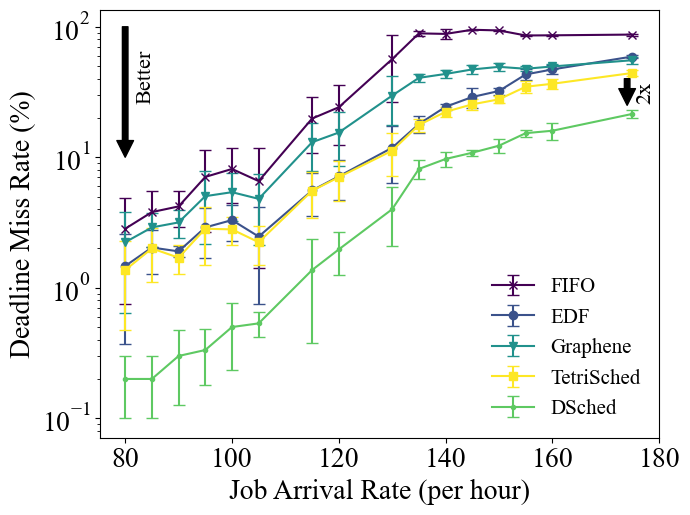

In [68]:
plt.figure(figsize=(7,5.25))
x_vals = list(sorted(miss_rate_datapoints["EDF"].keys()))
plt.errorbar(x_vals, 
             [miss_rate_datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals,
             [miss_rate_datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)


# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)

plt.xticks(list(np.arange(80, 190, 20)))
# plt.xticks(list(np.arange(80, 203, 20)))

plt.yscale('log')

plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Deadline Miss Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.legend(loc="lower right", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))

#Annotations 
plt.annotate('', xy=(174, (100-75)), xytext=(174, (100-60)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(175.5, (100-72), "2x", color='black', fontsize=16, rotation="vertical")

plt.annotate('', xy=(80, (10)), xytext=(80, (100)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(82, (100-72), "Better", color='black', fontsize=16, rotation="vertical")

# plt.annotate('', xy=(114.5, 100-50), xytext=(81, 100-50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 100-45, "43.75%", color='black', fontsize=20)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)

# plt.annotate('', xy=(175, 75), xytext=(175, 60),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")
plt.savefig("miss_rate_vs_arrival_rate.pdf", pad_inches=0, dpi=300)

In [7]:
utilization_at_p99 = {
    "FIFO": [32.04, 32.52, 36.30],
    "EDF": [48.21, 48.45, 51.83],
    "Graphene": [48.66, 48.89, 53.31],
    "TetriSched": [48.07, 48.37, 51.51],
    "DAGSched": [80.197, 76.58, 77.72],
}

utilization_at_p99_datapoints = {}
for scheduler, points in utilization_at_p99.items():
    utilization_at_p99_datapoints[scheduler] = DataPoint(
        min=np.min(points),
        mean=np.mean(points),
        median=np.median(points),
        max=np.max(points),
        sd=np.std(points, ddof=1))

In [8]:
utilization_at_p99_datapoints

{'FIFO': DataPoint(min=32.04, mean=33.62, median=32.52, max=36.3, sd=2.333323809504371),
 'EDF': DataPoint(min=48.21, mean=49.49666666666667, median=48.45, max=51.83, sd=2.0242858823133965),
 'Graphene': DataPoint(min=48.66, mean=50.28666666666667, median=48.89, max=53.31, sd=2.6208077635212668),
 'TetriSched': DataPoint(min=48.07, mean=49.31666666666666, median=48.37, max=51.51, sd=1.9053958468867647),
 'DAGSched': DataPoint(min=76.58, mean=78.16566666666667, median=77.72, max=80.197, sd=1.8492258740709155)}

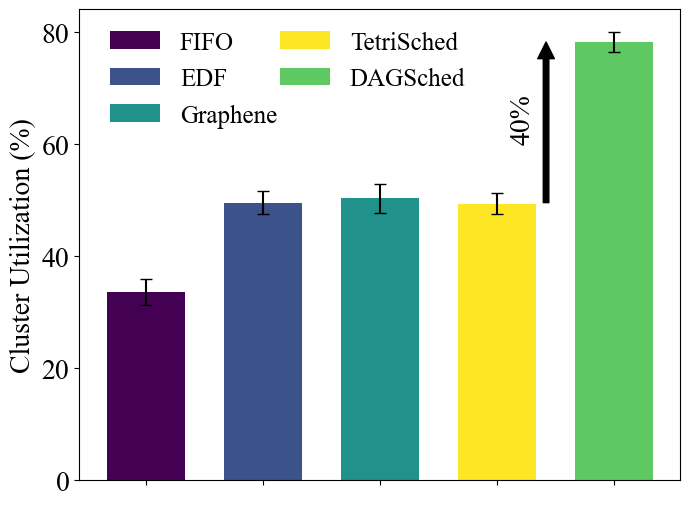

In [65]:
plt.figure(figsize=(7,5.25))
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
plt.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
plt.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
plt.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
plt.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
plt.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DAGSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

plt.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))

plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(0.70, 61, "40%", color='black', fontsize=20, rotation="vertical")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Cluster Utilization (%)", fontsize=20)
plt.tight_layout()
plt.savefig("cluster_utilization_at_p99.pdf", dpi=300, pad_inches=0)

In [149]:

for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: FIFO
Rate: 80, Data: DataPoint(min=94.8, mean=97.16666666666667, median=98.0, max=98.7, sd=2.0792626898334285)
Rate: 85, Data: DataPoint(min=94.4, mean=96.2, median=96.3, max=97.9, sd=1.7521415467935229)
Rate: 90, Data: DataPoint(min=94.5, mean=95.8, median=95.8, max=97.1, sd=1.2999999999999972)
Rate: 95, Data: DataPoint(min=89.3, mean=92.93333333333334, median=91.7, max=97.8, sd=4.382160806421111)
Rate: 100, Data: DataPoint(min=87.9, mean=91.86666666666667, median=92.5, max=95.2, sd=3.690979996333402)
Rate: 105, Data: DataPoint(min=87.6, mean=93.43333333333334, median=95.3, max=97.4, sd=5.159780357082401)
Rate: 115, Data: DataPoint(min=74.1, mean=80.2, median=75.9, max=90.6, sd=9.051519209502898)
Rate: 120, Data: DataPoint(min=68.8, mean=75.83333333333333, median=69.4, max=89.3, sd=11.66633332857129)
Rate: 130, Data: DataPoint(min=21.2, mean=43.46666666666667, median=31.3, max=77.9, sd=30.24472405781434)
Rate: 135, Data: DataPoint(min=8.5, mean=11.0, median=9.6, max=14.9, s

In [10]:
arrival_rate_at_p99 = {}
SLO_ATTAINMENT = 99
for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    max_arrival_rate = -1
    for arrival_rate, datapoint in arrival_rates.items():
        if datapoint.sd <= 2 and (datapoint.mean - datapoint.sd) <= SLO_ATTAINMENT and SLO_ATTAINMENT <= (datapoint.mean + datapoint.sd):
            if not (scheduler == "EDF" and datapoint.sd > 1.5):
                max_arrival_rate = max(max_arrival_rate, arrival_rate)   
    if max_arrival_rate == -1:
        max_arrival_rate = 75
    arrival_rate_at_p99[scheduler] = max_arrival_rate
    
# utilization_at_p99_datapoints = {}
# for scheduler, points in utilization_at_p99.items():
#     utilization_at_p99_datapoints[scheduler] = DataPoint(
#         min=np.min(points),
#         mean=np.mean(points),
#         median=np.median(points),
#         max=np.max(points),
#         sd=np.std(points, ddof=1))
arrival_rate_at_p99

Scheduler: FIFO
Scheduler: EDF
Scheduler: Graphene
Scheduler: TetriSched
Scheduler: DAGSched


{'FIFO': 75, 'EDF': 80, 'Graphene': 80, 'TetriSched': 80, 'DAGSched': 115}

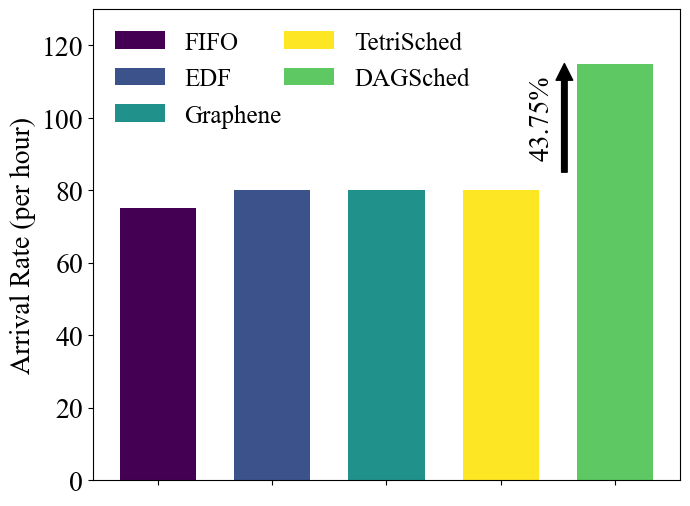

In [62]:
# plt.figure(figsize=(7,5.25))

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

# fig = plt.figure(figsize=(5, 4))
plt.figure(figsize=(7,5.25))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
plt.bar(xvals[0], [arrival_rate_at_p99["FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
plt.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
plt.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
plt.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
plt.bar(xvals[4], [arrival_rate_at_p99["DAGSched"]], capsize=4, color=dagsched, label="DAGSched", width=0.15)
plt.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Arrival Rate (per hour)", fontsize=20)
plt.tight_layout()
plt.ylim(0,130)
plt.annotate('', xy=(0.8, 115), xytext=(0.8, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(0.73, 90, "43.75%", color='black', fontsize=20, rotation="vertical")
plt.savefig("arrival_rate_at_p99.pdf", dpi=300, pad_inches=0)

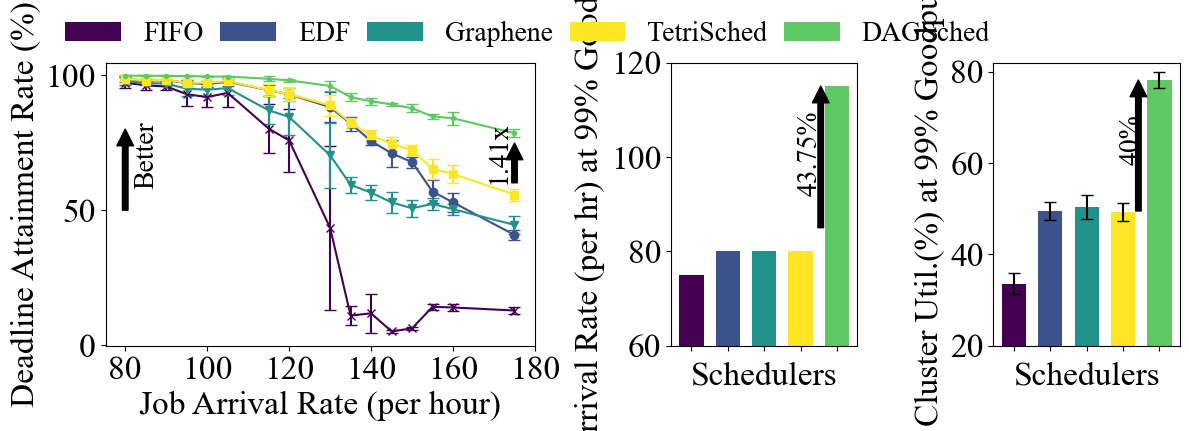

In [131]:
# fig = plt.figure(figsize=(16, 6))
fig = plt.figure(figsize=(12, 4))

axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [2.3, 1,1]})

# arrival rate sweep
ax = axs[0]

x_vals = list(sorted(datapoints["EDF"].keys()))
ax.errorbar(x_vals, 
             [datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
ax.errorbar(x_vals, 
             [datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
ax.errorbar(x_vals, 
             [datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
ax.errorbar(x_vals,
             [datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
ax.errorbar(x_vals, 
             [datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
ax.set_xticks(list(np.arange(80, 190, 20)))
# plt.ylim((30, 105))
# plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
ax.set_xlabel("Job Arrival Rate (per hour)", fontsize=24)
ax.set_ylabel("Deadline Attainment Rate (%)", fontsize=24)
# plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=24)
# ax.legend(loc="lower left", fontsize=20, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
# plt.tight24_layout()
# plt.legend()
ax.annotate('', xy=(175, 75), xytext=(175, 60),
             arrowprops=dict(facecolor='black', shrink=0.01))
ax.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")

ax.annotate('', xy=(80, (80)), xytext=(80, (50)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(82, 60, "Better", color='black', fontsize=20, rotation="vertical")

#################################################

ax = axs[1]

barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [arrival_rate_at_p99["FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [arrival_rate_at_p99["DAGSched"]], capsize=4, color=dagsched, label="DAGSched", width=0.15)
# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Arrival Rate (per hour)", fontsize=24)
ax.set_ylabel("Arrival Rate (per hr) at 99% Goodput", fontsize=24)
ax.set_xlabel("Schedulers", fontsize=24)

# ax.tight_layout()
ax.set_ylim(0,130)
ax.annotate('', xy=(0.8, 115), xytext=(0.8, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.65, 93, "43.75%", color='black', fontsize=20, rotation="vertical")

ax.set_ylim(60,120)




#################################################
ax = axs[2]
# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DAGSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))
ax.set_ylim(20,82)
ax.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.65, 61, "40%", color='black', fontsize=20, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=24)

ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Cluster Utilization (%)", fontsize=24)
ax.set_ylabel("Cluster Util.(%) at 99% Goodput", fontsize=24)
ax.set_xlabel("Schedulers", fontsize=24)


lines_labels = [fig.axes[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=20,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.85, 1.1))
fig.tight_layout()
# plt.savefig("deadline_attainment_rate_combined.pdf", dpi=300, pad_inches=0)

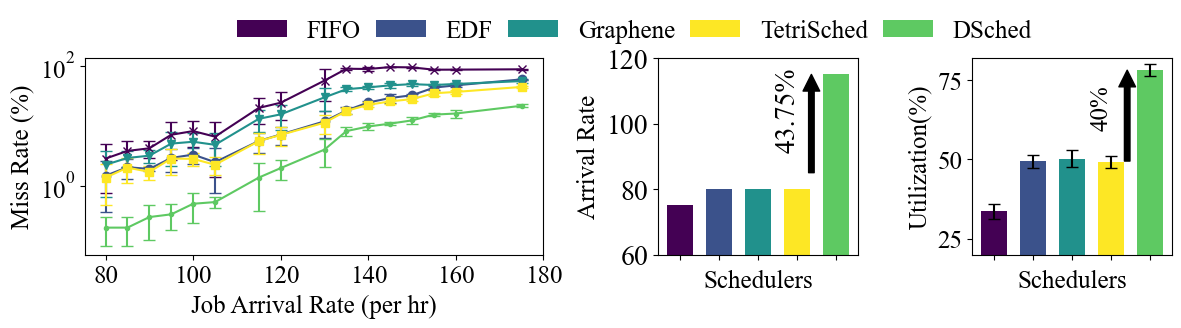

In [176]:
# fig = plt.figure(figsize=(17, 6))
# fig = plt.figure(figsize=(15.5, 5.5))
fig = plt.figure(figsize=(12, 3))


axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [2.3, 1,1]})

# arrival rate sweep
ax = axs[0]

x_vals = list(sorted(miss_rate_datapoints["EDF"].keys()))
ax.errorbar(x_vals, 
             [miss_rate_datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
ax.errorbar(x_vals,
             [miss_rate_datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)


# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)

ax.set_xticks(list(np.arange(80, 190, 20)))
# plt.xticks(list(np.arange(80, 203, 20)))

ax.set_yscale('log')

ax.set_xlabel("Job Arrival Rate (per hr)", fontsize=18)
ax.set_ylabel("Miss Rate (%)", fontsize=18)
ax.tick_params(axis="both", which='major', labelsize=18)
# ax.set_xtick_params(which='major', labelsize=20)

# plt.set_tight_layout()
# ax.legend(loc="lower right", fontsize=24, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))

#Annotations 
# ax.annotate('', xy=(174, (100-75)), xytext=(174, (100-60)),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# ax.text(175.5, (100-72), "2x", color='black', fontsize=20, rotation="vertical")

# ax.annotate('', xy=(80, (10)), xytext=(80, (100)),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# ax.text(82, (100-72), "Better", color='black', fontsize=20, rotation="vertical")

#################################################

ax = axs[1]

barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [arrival_rate_at_p99["FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [arrival_rate_at_p99["DAGSched"]], capsize=4, color=dagsched, label="DSched", width=0.15)
# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(xvals, ["", "", "", "", ""])
ax.set_ylabel("Arrival Rate", fontsize=18)
# ax.set_ylabel("Arrival Rate at 99% Goodput", fontsize=24)

ax.set_xlabel("Schedulers", fontsize=18)

# ax.tight_layout()
ax.set_ylim(0,130)
ax.annotate('', xy=(0.76, 115), xytext=(0.76, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.55, 93, "43.75%", color='black', fontsize=20, rotation="vertical")

ax.set_ylim(60,120)




#################################################
ax = axs[2]
# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))
ax.set_ylim(20,82)
ax.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.55, 61, "40%", color='black', fontsize=18, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Cluster Util.(%) at 99% Gput", fontsize=24)
ax.set_ylabel("Utilization(%)", fontsize=18)
ax.set_xlabel("Schedulers", fontsize=18)


lines_labels = [fig.axes[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=18,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.89, 1.12))
fig.tight_layout()
plt.savefig("deadline_miss_rate_combined.pdf", dpi=300, pad_inches=0, bbox_inches="tight")